# 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

In [1]:
!jt -r

Reset css and font defaults in:
C:\Users\hp\.jupyter\custom &
C:\Users\hp\AppData\Roaming\jupyter\nbextensions


# 2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\hp/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-31 Python-3.10.4 torch-2.0.1+cpu CPU

100%|██████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [01:20<00:00, 184kB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [7]:
img = "Dataset/Cars_traffic.jpg"

In [8]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 381.2ms pre-process, 590.8ms inference, 83.3ms NMS per image at shape (1, 3, 448, 640)


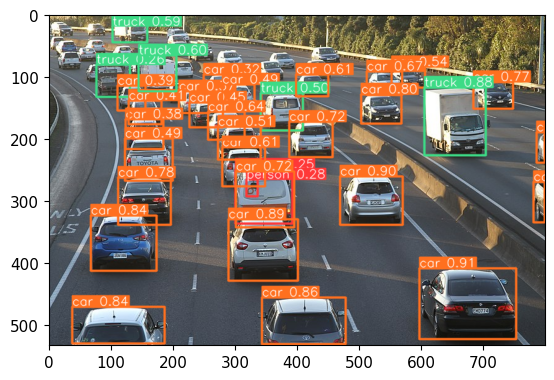

In [10]:
%matplotlib inline
# Render n-D Output matrices into 2D matrices and output the result to image
plt.imshow(np.squeeze(results.render()))
# Render Whole figure with it's components
plt.show()

In [13]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [14]:
IMAGES_PATH = os.path.join('Dataset', 'images') #/Dataset/images
labels = ['awake', 'drowsy']
number_imgs = 15

In [21]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 5 second delay between captures
        time.sleep(5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

## Yolo Format

Yolo format is a lightweight file format that results as an output of labelling images in LabelImg application for the YOLO model to be able to read in these custom annotations, elements of the yolo file are as follow in order:

* Class Number
* X Centre Coordinate
* Y Centre Coordinate
* Width
* Height

Note: Numbers are normalized except for class number 

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [15]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\hp/.cache\torch\hub\master.zip
YOLOv5  2023-6-1 Python-3.10.4 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [37]:
img_A = os.path.join('Dataset', 'images', 'awake.ff84550c-ffc6-11ed-b8e5-10e7c6800548.jpg')
img_D = os.path.join('Dataset', 'images', 'drowsy.0b7d1f90-ffc7-11ed-a6a0-10e7c6800548.jpg')

In [35]:
results = model([img_A, img_D])
results.print()
results.pandas().xyxy

image 1/2: 480x640 1 awake
image 2/2: 480x640 1 drowsy
Speed: 47.9ms pre-process, 305.6ms inference, 1.0ms NMS per image at shape (2, 3, 480, 640)


[         xmin        ymin        xmax        ymax  confidence  class   name
 0  238.335922  120.573647  435.611755  331.793243    0.910702     15  awake,
          xmin        ymin        xmax        ymax  confidence  class    name
 0  268.569946  137.542465  462.492676  359.648682    0.883745     16  drowsy]

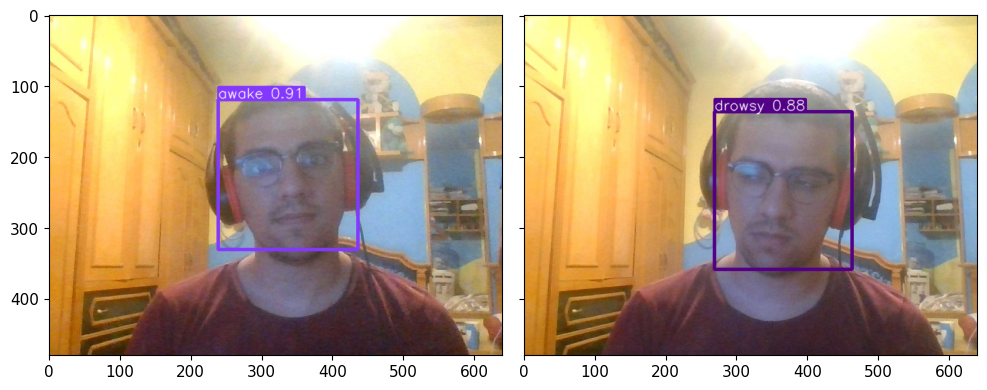

In [51]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 8))
ax1.imshow(results.render()[0])
ax2.imshow(results.render()[1])
plt.tight_layout()
plt.show()

In [52]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()